<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.616073,29.108722,-0.004281,65.720514,65.721331,-0.000817
1,0.0,1.0,93.966305,93.643702,0.007528,197.617535,197.612792,0.004743
2,0.0,2.0,20.724371,86.844696,0.000097,117.569164,117.567997,0.001167
3,0.0,3.0,98.584842,26.416288,-0.011127,134.990003,135.001019,-0.011016
4,0.0,4.0,79.399556,53.083483,0.006512,142.489551,142.483238,0.006313
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.984308,22.431189,-0.029485,83.386011,83.412772,-0.026761
59996,999.0,56.0,56.197972,38.412519,0.004372,104.614863,104.609188,0.005675
59997,999.0,57.0,68.973054,51.615048,0.006531,130.594632,130.588114,0.006519
59998,999.0,58.0,59.653578,56.015700,0.000557,125.669836,125.669503,0.000332


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.616073,29.108722,-0.004281,65.720514,65.721331,-0.000817
1,0.0,1.0,93.966305,93.643702,0.007528,197.617535,197.612792,0.004743
2,0.0,2.0,20.724371,86.844696,0.000097,117.569164,117.567997,0.001167
3,0.0,3.0,98.584842,26.416288,-0.011127,134.990003,135.001019,-0.011016
4,0.0,4.0,79.399556,53.083483,0.006512,142.489551,142.483238,0.006313
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.984308,22.431189,-0.029485,83.386011,83.412772,-0.026761
59996,999.0,56.0,56.197972,38.412519,0.004372,104.614863,104.609188,0.005675
59997,999.0,57.0,68.973054,51.615048,0.006531,130.594632,130.588114,0.006519
59998,999.0,58.0,59.653578,56.015700,0.000557,125.669836,125.669503,0.000332


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.616073,29.108722,-0.004281,65.720514,65.721331,-0.000817
1,0.0,1.0,93.966305,93.643702,0.007528,197.617535,197.612792,0.004743
2,0.0,2.0,20.724371,86.844696,0.000097,117.569164,117.567997,0.001167
3,0.0,3.0,98.584842,26.416288,-0.011127,134.990003,135.001019,-0.011016
4,0.0,4.0,79.399556,53.083483,0.006512,142.489551,142.483238,0.006313
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.984308,22.431189,-0.029485,83.386011,83.412772,-0.026761
59996,999.0,56.0,56.197972,38.412519,0.004372,104.614863,104.609188,0.005675
59997,999.0,57.0,68.973054,51.615048,0.006531,130.594632,130.588114,0.006519
59998,999.0,58.0,59.653578,56.015700,0.000557,125.669836,125.669503,0.000332


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

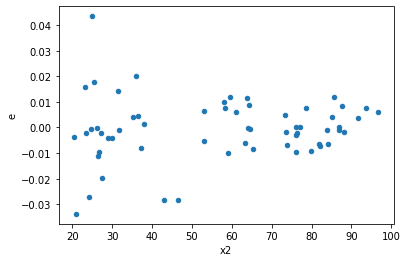

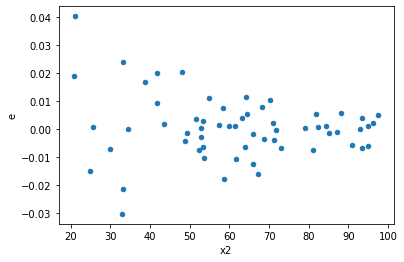

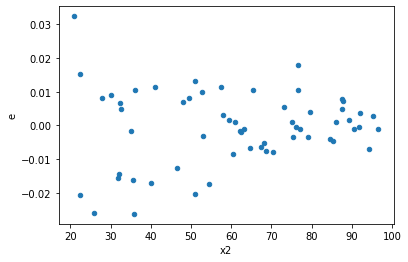

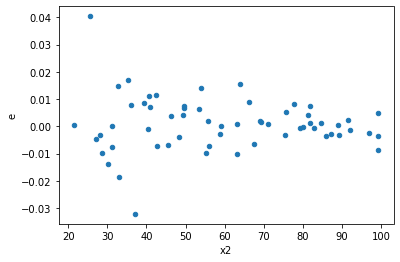

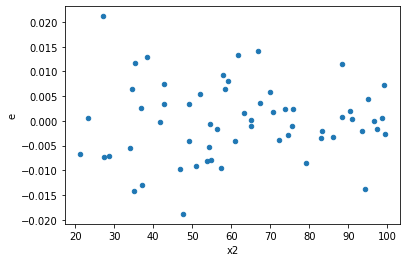

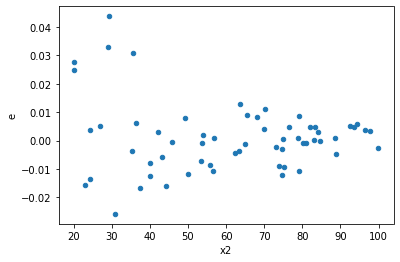

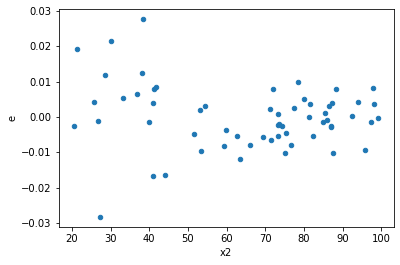

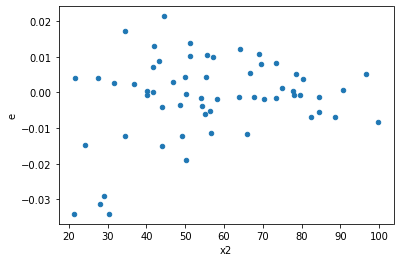

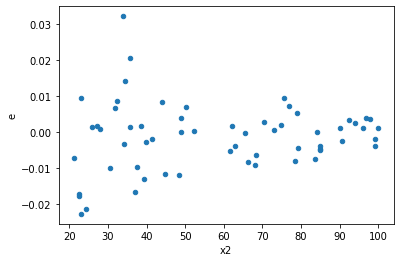

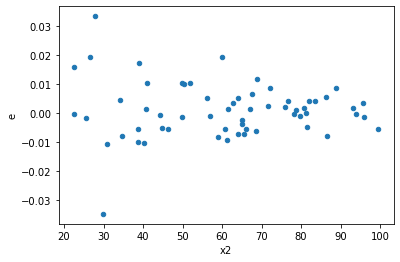

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
61.0,22.0,22.0,0.00112749712016486,0.0014323605098808194,5.1249869098402725e-05,6.51072959036736e-05,1.270389506335398,0.5793931343162195,0.7103034328418902,0.28969656715810976,Reject005=1 : Homoscedasticity
105.0,22.0,22.0,0.0015435849699419193,0.002010873226860187,7.016295317917815e-05,9.140332849364488e-05,1.3027292089633722,0.5403182635222898,0.7298408682388551,0.2701591317611449,Reject005=1 : Homoscedasticity
149.0,22.0,22.0,0.0023986114461729126,0.002588179905729403,0.00010902779300785967,0.00011764454116951831,1.0790325835636925,0.8600174234255258,0.5699912882872371,0.4300087117127629,Reject005=1 : Homoscedasticity
161.0,22.0,22.0,0.0019242494636942879,0.002339859990865414,8.746588471337673e-05,0.00010635727231206428,1.215985783035227,0.6504905917130563,0.6747547041434718,0.32524529585652817,Reject005=1 : Homoscedasticity
195.0,22.0,22.0,0.0008469204791868391,0.0010788845335506217,3.8496385417583596e-05,4.9040206070482806e-05,1.2738911858484048,0.575049018084941,0.7124754909575295,0.2875245090424705,Reject005=1 : Homoscedasticity
261.0,22.0,22.0,0.0018327534708238156,0.0019381430146604222,8.330697594653708e-05,8.809740975729192e-05,1.0575033933992413,0.8968567044910571,0.5515716477544714,0.44842835224552857,Reject005=1 : Homoscedasticity
457.0,22.0,22.0,0.0018599832256034985,0.0020044118758449927,8.45446920728863e-05,9.110963072022694e-05,1.0776505122483737,0.862351791783748,0.568824104108126,0.431175895891874,Reject005=1 : Homoscedasticity
572.0,22.0,22.0,0.0023994786086328837,0.002494059662188828,0.00010906720948331289,0.00011336634828131037,1.0394173355893481,0.9285736407709466,0.5357131796145267,0.4642868203854733,Reject005=1 : Homoscedasticity
796.0,22.0,22.0,0.001007402743545998,0.001194172434767488,4.579103379754536e-05,5.4280565216703995e-05,1.1853972429775919,0.6934863751765286,0.6532568124117357,0.3467431875882643,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.0037505574839249572,0.0010972233652777456,0.0001704798856329526,4.987378933080662e-05,0.2925494063163916,0.0056376128674632785,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.004000822772844615,0.0009013518973224273,0.00018185558058384614,4.097054078738306e-05,0.22529163337109265,0.0009171039950651146,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.004676633468623131,0.0005683832336076269,0.00021257424857377868,2.5835601527619408e-05,0.12153683572190815,6.020727245201e-06,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.003965486543074682,0.000755147855656578,0.00018024938832157647,3.432490252984445e-05,0.19043006386577369,0.0002561067734746967,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.001230719660502585,0.0010171699616216545,5.59418027501175e-05,4.623499825552975e-05,0.8264838811515175,0.6588079867999493,Reject005=1 : Homoscedasticity
5.0,22.0,22.0,0.005185879824255313,0.0006347928067949596,0.00023572181019342333,2.8854218490679984e-05,0.12240792851116931,6.412436727573128e-06,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.00215146216811061,0.001139866749411035,9.779373491411863e-05,5.181212497322886e-05,0.5298102687123024,0.14402511089009265,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,0.003198726326839282,0.0011227572166950704,0.00014539665121996736,5.103441894068502e-05,0.35100133677409245,0.0175033255693188,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.0022765842279572762,0.0005376315290742128,0.00010348110127078528,2.4437796776100583e-05,0.23615709995347572,0.0012923423249438543,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    861
Reject005=1 : Homoscedasticity      139
Name: Result_test, dtype: int64